Basic Statistics:
          Unnamed: 0       user id      converted      total ads  \
count  588101.000000  5.881010e+05  588101.000000  588101.000000   
mean   294050.000000  1.310692e+06       0.025239      24.820876   
std    169770.279667  2.022260e+05       0.156850      43.715181   
min         0.000000  9.000000e+05       0.000000       1.000000   
25%    147025.000000  1.143190e+06       0.000000       4.000000   
50%    294050.000000  1.313725e+06       0.000000      13.000000   
75%    441075.000000  1.484088e+06       0.000000      27.000000   
max    588100.000000  1.654483e+06       1.000000    2065.000000   

       most ads hour  
count  588101.000000  
mean       14.469061  
std         4.834634  
min         0.000000  
25%        11.000000  
50%        14.000000  
75%        18.000000  
max        23.000000  

Missing Values:
Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

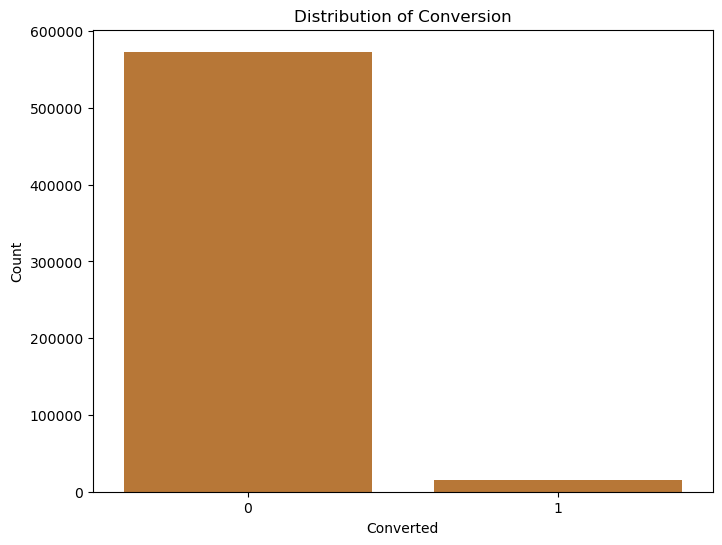

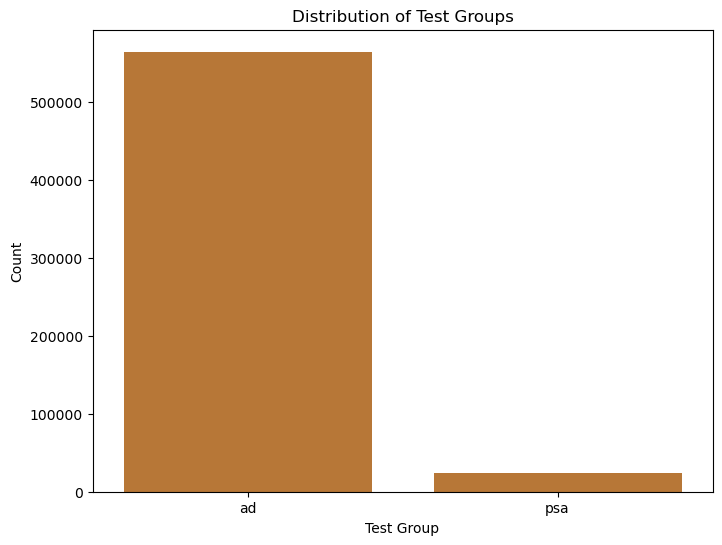

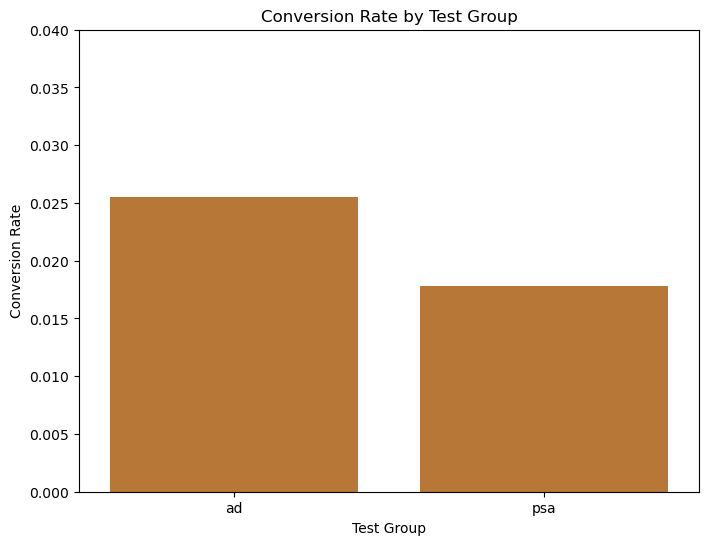

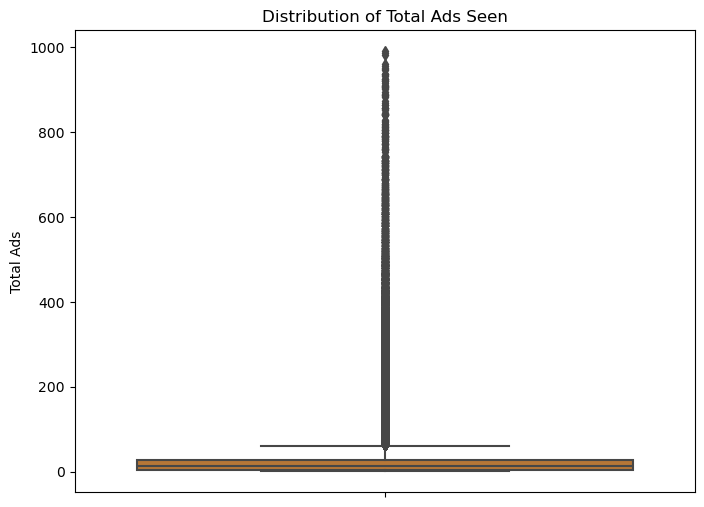

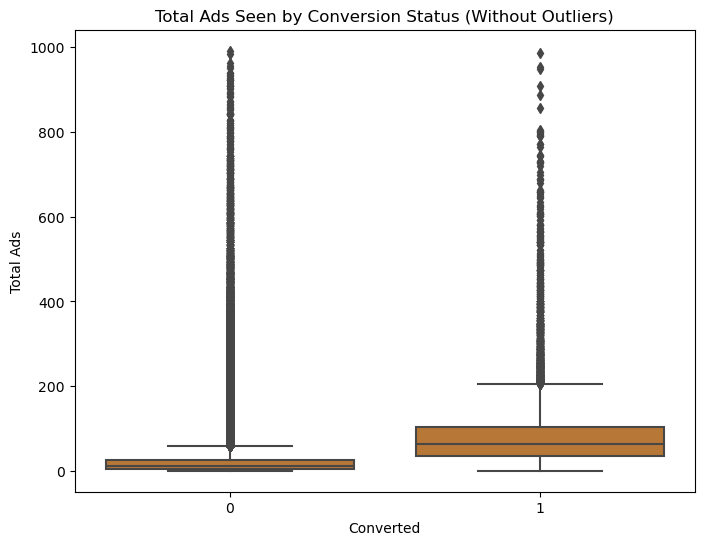

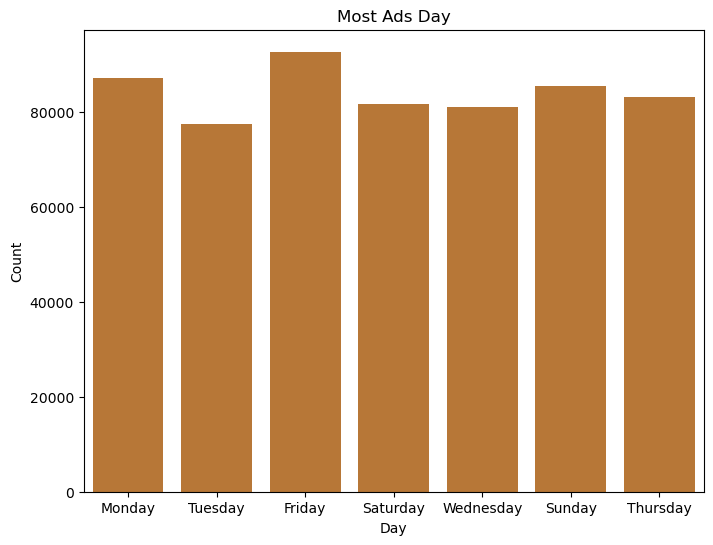

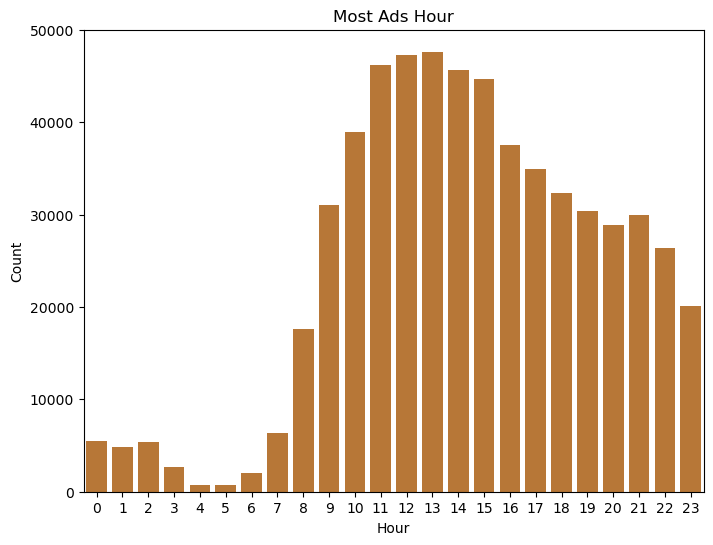

Control Conversion Rate: 1.79%
Experimental Conversion Rate: 2.55%
Z-statistic: -7.36
P-value: 0.0000
Relative Difference: 43.01%


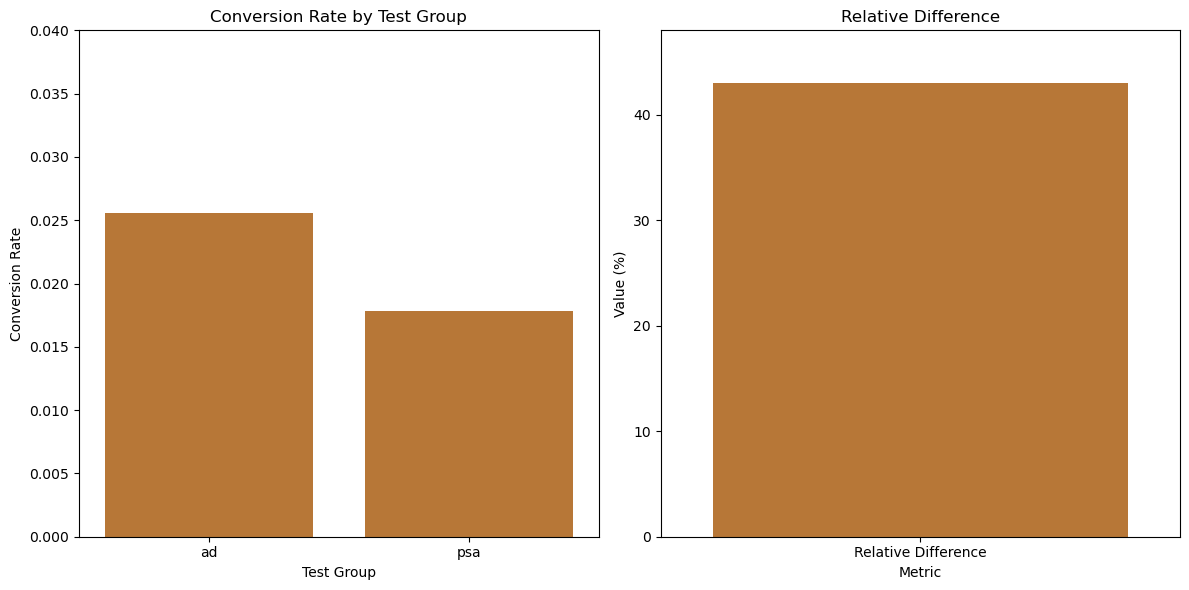

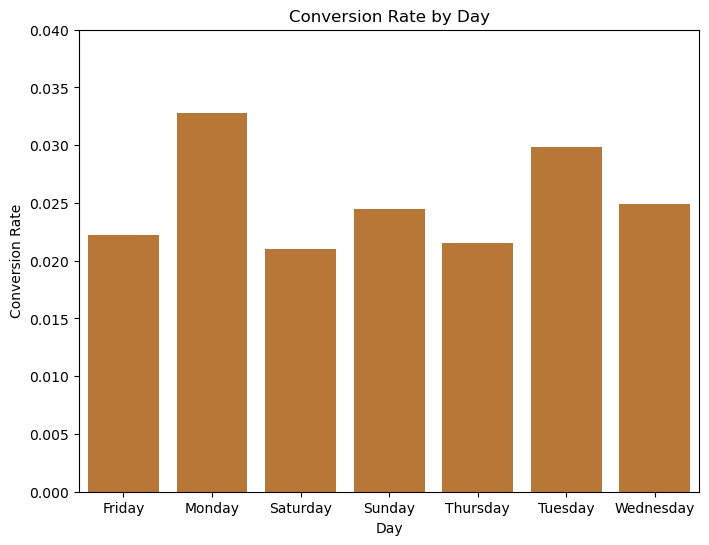

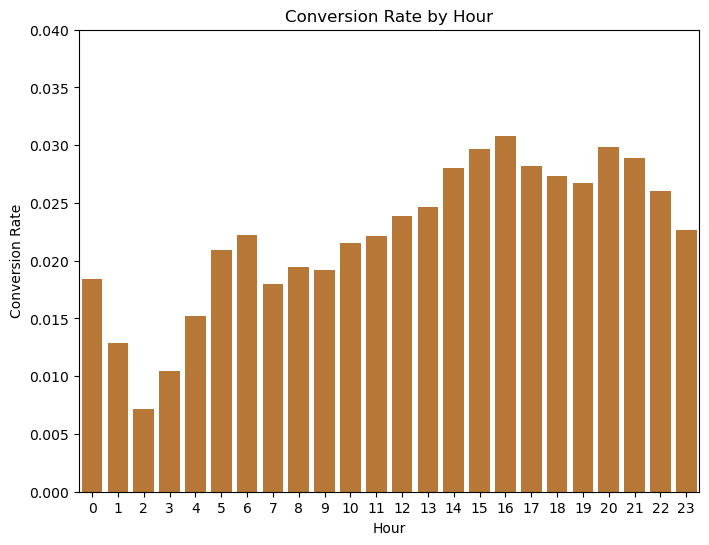

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset
data = pd.read_csv('/home/desktopspace/Desktop/Data_Analyst/marketing_AB.csv')

# Convert boolean 'converted' column to integer
data['converted'] = data['converted'].astype(int)

# Exploratory Data Analysis (EDA)

# Basic statistics
print("Basic Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())
data = data[data['total ads'] < 1000]
# Plotting functions
def plot_countplot(column, title, xlabel, ylabel, color='#008080'):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=data, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def plot_histogram(column, bins, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], bins=bins, kde=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def plot_boxplot(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=x, y=y, data=data, color = '#CC7722')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Distribution of converted
plot_countplot('converted', 'Distribution of Conversion', 'Converted', 'Count', color='#CC7722')

# Distribution of test group
plot_countplot('test group', 'Distribution of Test Groups', 'Test Group', 'Count', color='#CC7722')

# Conversion rate by test group
conversion_rate = data.groupby('test group')['converted'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='test group', y='converted', data=conversion_rate, color = '#CC7722')
plt.title('Conversion Rate by Test Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Test Group')
plt.ylim(0, 0.04)
plt.show()

# Distribution of total ads seen (box plot)
plt.figure(figsize=(8, 6))
sns.boxplot(y='total ads', data=data, color = '#CC7722', hue='test group' )
plt.title('Distribution of Total Ads Seen')
plt.ylabel('Total Ads')
plt.show()

# Remove outliers for conversion rate by total ads seen
Q1 = data['total ads'].quantile(0.25)
Q3 = data['total ads'].quantile(0.75)
IQR = Q3 - Q1
filtered_data = data[(data['total ads'] >= (Q1 - 1.5 * IQR)) & (data['total ads'] <= (Q3 + 1.5 * IQR))]

# Conversion rate by total ads seen (box plot without outliers)
plot_boxplot('converted', 'total ads', 'Total Ads Seen by Conversion Status (Without Outliers)', 'Converted', 'Total Ads')

# Most ads day (same color)
plot_countplot('most ads day', 'Most Ads Day', 'Day', 'Count', color='#CC7722')

# Most ads hour (same color)
plot_countplot('most ads hour', 'Most Ads Hour', 'Hour', 'Count', color='#CC7722')

# A/B Testing
control_group = data[data['test group'] == 'psa']
experimental_group = data[data['test group'] == 'ad']

control_conversion_rate = control_group['converted'].mean()
experimental_conversion_rate = experimental_group['converted'].mean()

print(f"Control Conversion Rate: {control_conversion_rate:.2%}")
print(f"Experimental Conversion Rate: {experimental_conversion_rate:.2%}")

# Manual z-test for proportions
count_control = control_group['converted'].sum()
count_experimental = experimental_group['converted'].sum()
n_control = control_group['converted'].count()
n_experimental = experimental_group['converted'].count()

p1 = count_control / n_control
p2 = count_experimental / n_experimental
p_combined = (count_control + count_experimental) / (n_control + n_experimental)
z_stat = (p1 - p2) / np.sqrt(p_combined * (1 - p_combined) * (1/n_control + 1/n_experimental))
p_value = stats.norm.sf(abs(z_stat)) * 2  # Two-tailed test

print(f"Z-statistic: {z_stat:.2f}")
print(f"P-value: {p_value:.4f}")

relative_difference = (experimental_conversion_rate - control_conversion_rate) / control_conversion_rate * 100

print(f"Relative Difference: {relative_difference:.2f}%")

# Plot Results
plt.figure(figsize=(12, 6))

# Subplot 1: Conversion Rate by Test Group
plt.subplot(1, 2, 1)
sns.barplot(x='test group', y='converted', data=conversion_rate, color= '#CC7722')
plt.title('Conversion Rate by Test Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Test Group')
plt.ylim(0, 0.04)

# Subplot 2: Relative Lift
plt.subplot(1, 2, 2)
difference_data = pd.DataFrame({
    'Metric': ['Relative Difference'],
    'Value': [relative_difference]
})
sns.barplot(x='Metric', y='Value', data=difference_data, color='#CC7722')
plt.title('Relative Difference')
plt.ylabel('Value (%)')
plt.ylim(0, max(difference_data['Value']) + 5)

plt.tight_layout()
plt.show()

# Conversion rate by day
conversion_rate_by_day = data.groupby('most ads day')['converted'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='most ads day', y='converted', data=conversion_rate_by_day, color='#CC7722')
plt.title('Conversion Rate by Day')
plt.ylabel('Conversion Rate')
plt.xlabel('Day')
plt.ylim(0, 0.04)
plt.show()

# Conversion rate by hour
conversion_rate_by_hour = data.groupby('most ads hour')['converted'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='most ads hour', y='converted', data=conversion_rate_by_hour, color='#CC7722')
plt.title('Conversion Rate by Hour')
plt.ylabel('Conversion Rate')
plt.xlabel('Hour')
plt.ylim(0, 0.04)
plt.show()


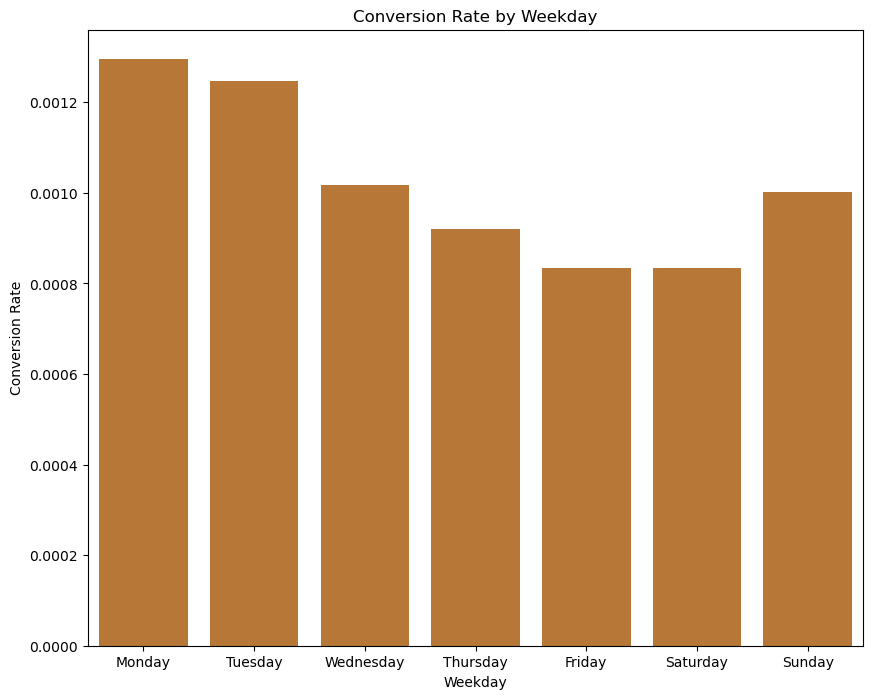

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_conversion_rate_by_weekday(data, weekday_column, conversion_column, ads_column, title, xlabel, ylabel, color):
    # Ensure the weekday column is categorical with correct order
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    data[weekday_column] = pd.Categorical(data[weekday_column], categories=days_order, ordered=True)

#Aggregate data by weekdays
    aggregated_data = data.groupby(weekday_column).agg(
        total_ads=pd.NamedAgg(column=ads_column, aggfunc='sum'),
        total_conversions=pd.NamedAgg(column=conversion_column, aggfunc='sum')
    ).reset_index()

#Calculate conversion rate
    aggregated_data['conversion_rate'] = aggregated_data['total_conversions'] / aggregated_data['total_ads']

#Plot
    plt.figure(figsize=(10, 8))
    sns.barplot(x=weekday_column, y='conversion_rate', data=aggregated_data, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=0)  # Rotate x labels for better readability
    plt.show()

#Usage example
plot_conversion_rate_by_weekday(
    data,
    'most ads day',       # Column with weekday information
    'converted',          # Column indicating conversions
    'total ads',          # Column with total ads seen
    'Conversion Rate by Weekday',  # Title
    'Weekday',            # X-axis label
    'Conversion Rate',    # Y-axis label
    '#CC7722'             # Custom color
)

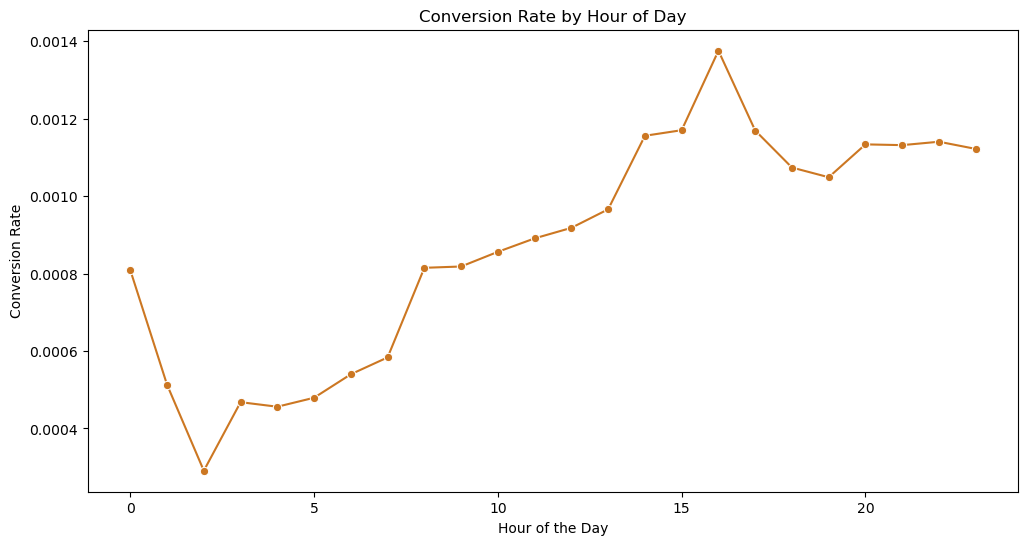

In [43]:
def plot_conversion_rate_by_hour(data, hour_column, conversion_column, ads_column, title, xlabel, ylabel, color):
    # Ensure the hour column is numeric
    data[hour_column] = pd.to_numeric(data[hour_column], errors='coerce')

#Aggregate data by hours
    aggregated_data = data.groupby(hour_column).agg(
        total_ads=pd.NamedAgg(column=ads_column, aggfunc='sum'),
        total_conversions=pd.NamedAgg(column=conversion_column, aggfunc='sum')
    ).reset_index()

#Calculate conversion rate
    aggregated_data['conversion_rate'] = aggregated_data['total_conversions'] / aggregated_data['total_ads']

#Plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=hour_column, y='conversion_rate', data=aggregated_data, marker='o', color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=0)  # Rotate x labels for better readability
    plt.show()

#Usage example
plot_conversion_rate_by_hour(
    data,
    'most ads hour',      # Column with hour information
    'converted',          # Column indicating conversions
    'total ads',          # Column with total ads seen
    'Conversion Rate by Hour of Day',  # Title
    'Hour of the Day',    # X-axis label
    'Conversion Rate',    # Y-axis label
    '#CC7722'             # Custom color
)

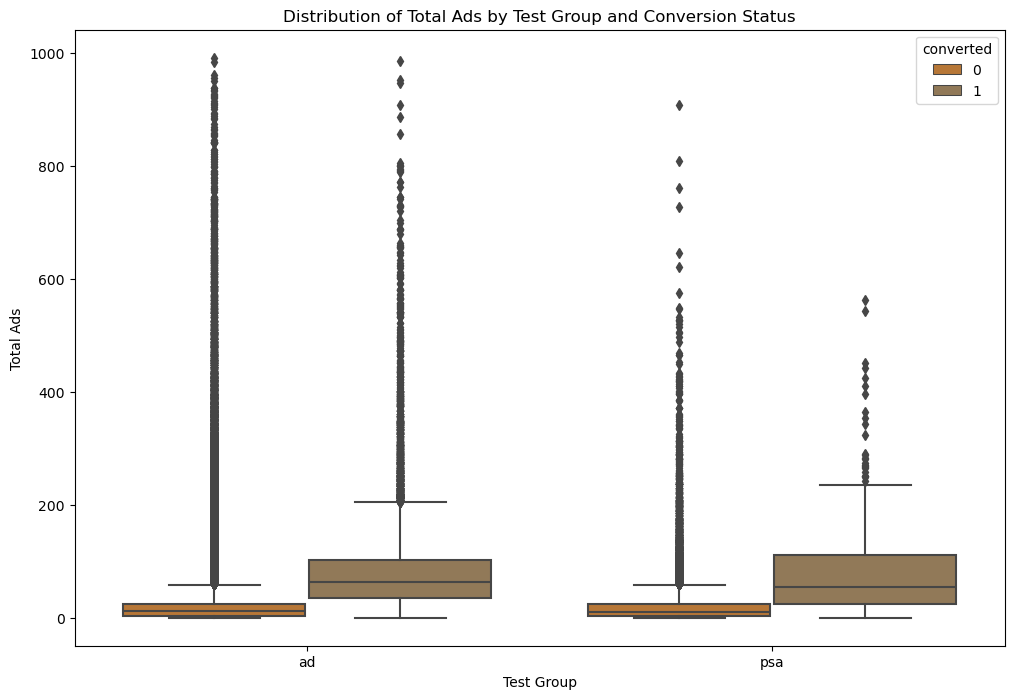

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_boxplot_by_group_and_conversion(data, group_column, conversion_column, value_column, title, xlabel, ylabel, color_palette):
    # Ensure the group_column and conversion_column are categorical
    data[group_column] = data[group_column].astype('category')
    
    data[conversion_column] = data[conversion_column].astype('category')

#Plot
    plt.figure(figsize=(12, 8))
    sns.boxplot(
        x=group_column, 
        y=value_column, 
        hue=conversion_column,
        data=data,
        palette=color_palette
    )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(title=conversion_column)
    plt.xticks(rotation=0)  # Rotate x labels for better readability
    plt.show()

#Usage example
custom_palette = {0: '#CC7722', 1: '#9A7B4F'}
plot_boxplot_by_group_and_conversion(
    data,
    'test group',         # Column indicating the test group
    'converted',          # Column indicating conversion status
    'total ads',          # Column with values to plot
    'Distribution of Total Ads by Test Group and Conversion Status',  # Title
    'Test Group',         # X-axis label
    'Total Ads',          # Y-axis label
    custom_palette               # Color palette (you can use 'Set1' or any seaborn color palette)
)